<a href="https://colab.research.google.com/github/Norberto27/Norberto27/blob/main/TP3_Postas_desafio_imagenes_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Práctico Evaluativo (TP 3):**

#**Clasificación de Imágenes con PyTorch y redes convolucionales**

**TRABAJO EN EQUIPO POR POSTAS**

#**POSTA 1: NORBERTO MARTEARENA URQUIZA - PASO 1**

#**POSTA 2:**
.

.

.



## Objetivos

Este trabajo práctico tiene como objetivo evaluar su capacidad para:
- Implementar un data loader personalizado en PyTorch
- Diseñar e implementar redes neuronales convolucionales
- Entrenar y evaluar modelos de aprendizaje profundo
- Documentar adecuadamente el proceso y resultados de cada consigna.

## Parte 1: Clasificador de Perros y Gatos con CNN

### Datos
He utilñizado el dataset "Cats and Dogs" de Microsoft disponible en el sitio oficial, para ello utilice el generador de colab

BREVE INTRODUCCIÓN a mi Posta (Posta 1)

En este primer paso del trabajo práctico me enfoque en preparar y explorar el dataset que será utilizado para entrenar una red neuronal convolucional (CNN). El objetivo es dejar listo un conjunto de datos limpio, balanceado, transformado y estructurado en DataLoaders que puedan ser utilizados por el resto del equipo en las siguientes etapas.

Para ello:
- Se implementó un dataset personalizado basado en `torch.utils.data.Dataset`.
- Se incorporaron transformaciones básicas (normalización, redimensionamiento, data augmentation).
- Se parametrizaron variables para facilitar pruebas con distintos tamaños de imagen o subconjuntos de datos.
- Se dividió el dataset en entrenamiento, validación y prueba (70/15/15).
- Se realizó una exploración inicial visual y cuantitativa para verificar la correcta distribución de clases y el formato de los tensores.

Este trabajo está pensado para facilitar el trabajo en equipo y permitir ajustes simples mediante la modificación de variables globales sin tocar el cuerpo principal del código.

#**PASO 1 - POSTA 1. Preprocesamiento y Data Loader. [Nombre de quien resuelve: Norberto Martearena Urquiza]**

-1.1 Descargue y descomprima el dataset.

-1.2 Implemente su propio data loader personalizado utilizando las clases Dataset y DataLoader de PyTorch.

-1.2.1 Incluya transformaciones apropiadas para las imágenes (redimensionamiento, normalización, data augmentation, etc.)

-1.2.2 Divida los datos en conjuntos de entrenamiento, validación y prueba (sugerencia: 70%, 15%, 15%).

-1.3 Realice una exploración inicial de los datos (distribución de clases, dimensiones de las imágenes, etc.).

#PASO 1.1 DESCARGA DEL archivo del sitio oficial kagglecatsanddogs

En esta sección descargamos y descomprimimos el dataset original completo desde el sitio oficial de Microsoft. La descarga y extracción se realiza con los comandos `wget` y `unzip`, respectivamente, generados por la opcion de colab.

❗ Importante:
Ni `wget` ni `unzip` permiten limitar directamente la cantidad de archivos (IMAGENES) que se descargan o descomprimen. Siempre se descarga y extrae el paquete completo.

✅ Para trabajar con un subconjunto de imágenes (por ejemplo, 1000 gatos y 1000 perros), esta limitación debe aplicarse luego en el código Python, dentro del Dataset personalizado, mediante el parámetro `max_per_class`.

✅ Para esta corrida, se asume el valor None, o sea, el valor por omision se le da el total de registros que trae originalmente, aunque este se puede modificar. Esta parametrizacion, se realizo en el PASO 1.2.1


Esto permite controlar la cantidad de imágenes utilizadas **sin modificar el archivo comprimido original**.

In [ ]:
# prompt: descargar https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-05-25 19:13:53--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.62.161.112, 2600:1408:c400:193::317f, 2600:1408:c400:18b::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.62.161.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  21.1MB/s    in 11s     

2025-05-25 19:14:04 (70.9 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



##PASO 1.1.1 DESCOMPRIMIR EL ARCHIVO

REALIZO LA DESCOMPRESION DEL ARCHIVO BAJADO UTILIZANDO LAS NUEVAS FACILIDADES DE COLAB PARA LA GENERACION DE CODIGO  IGUAL QUE EN LA DESCARGA

In [ ]:
# prompt: DESCOMPRIMO EL ARCHIVO ZIP BAJADO

!unzip -q kagglecatsanddogs_5340.zip

q significa quiet (modo silencioso): evita mostrar en pantalla todos los archivos que está extrayendo.

El archivo kagglecatsanddogs_5340.zip contiene una carpeta llamada PetImages/, con dos subcarpetas:

PetImages/Cat/

PetImages/Dog/

con el siguiente comando se muestran los archivos y carpetas en el directorio actual con detalles como tamaño, permisos, fecha y nombre.
en este caso especifico -1, permite verificar visualmente que el archivo fue descomprimido correctamente y que la carpeta PetImages/ está disponible.

In [ ]:
! ls -l

total 805600
-rw-r--r-- 1 root root     24876 May  9  2022  CDLA-Permissive-2.0.pdf
-rw-r--r-- 1 root root 824887076 Feb 17 11:10  kagglecatsanddogs_5340.zip
drwxr-xr-x 4 root root      4096 May 25 19:14  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 May 14 13:38  sample_data


In [ ]:
! ls -l PetImages/Dog/*.jpg | wc -l

12500


wc -1, es para confirmar que hay efectivamente 12.500 imágenes de perros (o las que quedaron tras la descompresión), y se puede verificar que tiene la misma cantidad la carpeta de gatos.

*En esta tarea voy a cargar solo los nombres de los archivos .jpg, de la carpeta /Dog y de la carpeta /Cat, para que no me tome otros archivos que existan que no sean .jpg, como por ejemplo .DB*



In [ ]:
# prompt: cargar los nombres de archivos del directorio PetImages que sean jpg
# aqui  Versión optimizada para listar archivos válidos por clase
import os

cat_files = [f for f in os.listdir('PetImages/Cat') if f.endswith('.jpg')]
dog_files = [f for f in os.listdir('PetImages/Dog') if f.endswith('.jpg')]

print(f"Total imágenes .jpg en Cat: {len(cat_files)}")
print(f"Total imágenes .jpg en Dog: {len(dog_files)}")

# Visualización de los primeros 10 archivos de cada clase
print("Ejemplos Cat:", cat_files[:10])
print("Ejemplos Dog:", dog_files[:10])


# Este paso permite verificar si hay nombres inusuales, errores de codificación o archivos duplicados y se indica la cantidad de imagenes en cada sub carpeta
# También ayuda a observar patrones como si hay imágenes con nombres como `0.jpg`, etc. Esto será útil al momento de cargarlos como datos etiquetados.

Total imágenes .jpg en Cat: 12500
Total imágenes .jpg en Dog: 12500
Ejemplos Cat: ['932.jpg', '8532.jpg', '8355.jpg', '1905.jpg', '8662.jpg', '11033.jpg', '11368.jpg', '9042.jpg', '10995.jpg', '10477.jpg']
Ejemplos Dog: ['932.jpg', '8532.jpg', '8355.jpg', '1905.jpg', '8662.jpg', '11033.jpg', '11368.jpg', '9042.jpg', '10995.jpg', '10477.jpg']


In [15]:
dog_files

['932.jpg',
 '8532.jpg',
 '8355.jpg',
 '1905.jpg',
 '8662.jpg',
 '11033.jpg',
 '11368.jpg',
 '9042.jpg',
 '10995.jpg',
 '10477.jpg',
 '8193.jpg',
 '10180.jpg',
 '7306.jpg',
 '9624.jpg',
 '8138.jpg',
 '12227.jpg',
 '966.jpg',
 '11342.jpg',
 '9663.jpg',
 '836.jpg',
 '1247.jpg',
 '1790.jpg',
 '11205.jpg',
 '2531.jpg',
 '3167.jpg',
 '10389.jpg',
 '8136.jpg',
 '4346.jpg',
 '4211.jpg',
 '11256.jpg',
 '2867.jpg',
 '11400.jpg',
 '2579.jpg',
 '2467.jpg',
 '4096.jpg',
 '2703.jpg',
 '1053.jpg',
 '12451.jpg',
 '11608.jpg',
 '469.jpg',
 '224.jpg',
 '3109.jpg',
 '4987.jpg',
 '5747.jpg',
 '3849.jpg',
 '5521.jpg',
 '5497.jpg',
 '8027.jpg',
 '11456.jpg',
 '2401.jpg',
 '3614.jpg',
 '7866.jpg',
 '8926.jpg',
 '1627.jpg',
 '8283.jpg',
 '3025.jpg',
 '4699.jpg',
 '3598.jpg',
 '8202.jpg',
 '6618.jpg',
 '1897.jpg',
 '11480.jpg',
 '4203.jpg',
 '3224.jpg',
 '570.jpg',
 '2064.jpg',
 '3307.jpg',
 '5903.jpg',
 '1628.jpg',
 '11238.jpg',
 '5825.jpg',
 '7655.jpg',
 '6907.jpg',
 '1224.jpg',
 '8765.jpg',
 '10508.jpg',
 

#**PASO 1.2**

Implemente su propio data loader personalizado utilizando las clases Dataset y DataLoader de PyTorch.

#**PARTE 1.2 - Dataset personalizado**


In [ ]:
# PARTE 1.2 - Dataset personalizado
# prompt: Crear una clase Dataset que cargue imágenes desde carpetas Cat y Dog con etiquetas automáticas y control de errores.
# ----------------------------- Importar librerias
import os
from PIL import Image, UnidentifiedImageError
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from collections import Counter
import matplotlib.pyplot as plt

En esta sección definimos una clase Dataset personalizada llamada GatosPerrosDataset que permite:

cargar imágenes desde las carpetas PetImages/Cat y PetImages/Dog

Asignar automáticamente etiquetas 0 a los gatos y 1 a los perros según el nombre de la carpeta

Aplicar transformaciones a las imágenes (rescale, normalización, etc.)

Manejar errores por imágenes corruptas usando try/except

Esta clase es una subclase de torch.utils.data.Dataset y es fundamental para usar DataLoader luego.

   




In [ ]:

# Creamos una clase heredada de torch.utils.data.Dataset
# que permite cargar imágenes desde carpetas "PetImages/Cat" y "PetImages/Dog".
# Se asignan etiquetas automáticas (0=gato, 1=perro) según el nombre de la carpeta.
#
# ⚠️ Se agregó un bloque try/except en __getitem__ para evitar errores por imágenes corruptas.
# Si una imagen no se puede abrir, se elige aleatoriamente otra y se informa por consola.

class GatosPerrosDataset(Dataset):
    def __init__(self, root_dir, transform=None, max_per_class=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        clases = os.listdir(root_dir)

        for idx, clase in enumerate(clases):
            clase_path = os.path.join(root_dir, clase)
            if not os.path.isdir(clase_path):
                continue

            archivos = [f for f in os.listdir(clase_path) if f.endswith('.jpg')]
            if max_per_class:
                archivos = archivos[:max_per_class]

            for archivo in archivos:
                self.data.append((os.path.join(clase_path, archivo), idx))

    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
          # Intentamos abrir la imagen. Si falla, probamos con otra aleatoria.
          while True:
              img_path, label = self.data[idx]
              try:
                  image = Image.open(img_path).convert("RGB")
                  if self.transform:
                      image = self.transform(image)
                  return image, label
              except (UnidentifiedImageError, OSError) as e:
                  print(f"⚠️ Imagen inválida: {img_path} — {e}")
                  idx = torch.randint(0, len(self.data), (1,)).item()






#**PASO 1.2.1  Incluya transformaciones apropiadas para las imágenes (redimensionamiento, normalización, data augmentation, etc.)**

In [ ]:
# prompt: Definir parámetros por defecto y transformaciones para preprocesar imágenes de entrada al modelo.

# -----------------------------
# PARTE 1.2.1 - Transformaciones y configuraciones por defecto
# -----------------------------

# Defino variables configurables para permitir ajustes sin cambiar el código base
image_size = 128              # Tamaño de imagen a usar (por defecto: 128x128)
batch_size = 32               # Tamaño del lote de entrenamiento (modificable para pruebas de memoria o estabilidad)
max_images_per_class = None   # Cantidad máxima de imágenes por clase (None usa todas, por ejemplo las 12500 por clase)

# Aplicamos transformaciones comunes para entrenamiento:
# - Resize: redimensiona todas las imágenes al tamaño definido (image_size x image_size)
# - RandomHorizontalFlip: voltea horizontalmente algunas imágenes para aumentar variedad (data augmentation)
# - ToTensor: convierte la imagen a tensor y normaliza a valores [0, 1]
# - Normalize: normaliza los canales de color a [-1, 1] centrando en 0 para estabilizar el entrenamiento

data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])



In [ ]:
# prompt: Cargar el dataset completo aplicando la clase personalizada con transformaciones y configuración definida.

# -----------------------------
# Cargar dataset completo
# -----------------------------

# El archivo ya se descargo y se descomprimió el ZIP en PetImages/ en el paso 1.1 y paso  1.1.1
# Esta ruta puede adaptarse si el directorio cambia
ruta_dataset = "PetImages"
dataset = GatosPerrosDataset(root_dir=ruta_dataset, transform=data_transforms, max_per_class=max_images_per_class)


#**PARTE 1.2.2 - Dividir en entrenamiento, validación y prueba (70/15/15)**

In [ ]:
# prompt: Dividir el dataset en subconjuntos de entrenamiento, validación y prueba utilizando random_split.
# -----------------------------
# PARTE 1.2.2 - Dividir en entrenamiento, validación y prueba (70/15/15)
# -----------------------------

# Usamos torch.utils.data.random_split para dividir el conjunto
longitud = len(dataset)
entrenamiento, validacion, prueba = random_split(dataset, [int(0.7*longitud), int(0.15*longitud), longitud - int(0.7*longitud) - int(0.15*longitud)])

# Creamos los dataloaders que se usarán en el entrenamiento del modelo
train_loader = DataLoader(entrenamiento, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validacion, batch_size=batch_size)
test_loader = DataLoader(prueba, batch_size=batch_size)

#**PARTE 1.3 - Exploración de los datos**

⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'
Distribución de clases:
Entrenamiento: Counter({0: 8750, 1: 8750})
Validación: Counter({0: 1885, 1: 1865})
Prueba: Counter({1: 1885, 0: 1865})
Forma del lote de entrenamiento: torch.Size([32, 3, 128, 128])


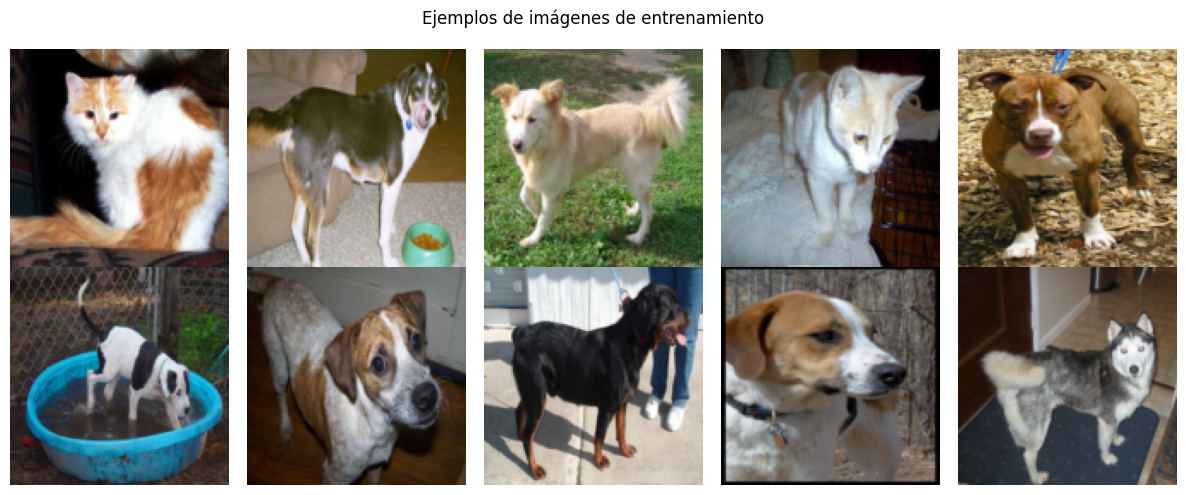

In [ ]:
# prompt: Explorar visualmente y cuantitativamente la distribución de clases y forma de los tensores en los dataloaders.
# -----------------------------
# PARTE 1.3 - Exploración de los datos
# -----------------------------

# Analizamos la distribución de etiquetas (clases) en cada subconjunto
labels_entrenamiento = [label for _, label in entrenamiento]
labels_validacion = [label for _, label in validacion]
labels_prueba = [label for _, label in prueba]

print("Distribución de clases:")
print("Entrenamiento:", Counter(labels_entrenamiento))
print("Validación:", Counter(labels_validacion))
print("Prueba:", Counter(labels_prueba))

# Visualizamos las dimensiones de los tensores de imagen
sample_imgs, _ = next(iter(train_loader))
print("Forma del lote de entrenamiento:", sample_imgs.shape)  # (batch_size, canales, alto, ancho)

# Visualizamos un grupo de 10 imágenes del conjunto de entrenamiento
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axs.flat):
    img = sample_imgs[i].permute(1, 2, 0) * 0.5 + 0.5  # desnormalizamos para visualizar
    ax.imshow(img)
    ax.axis('off')
plt.suptitle("Ejemplos de imágenes de entrenamiento")
plt.tight_layout()
plt.show()


Recomendaciones clave:

Correr el notebook completo desde el principio para que la clase GatosPerrosDataset esté definida.
No cambiar el nombre ni la estructura de carpetas: PetImages/Cat y PetImages/Dog deben estar presentes.
Puede usar los siguientes valores por defecto:
image_size = 128
batch_size = 32
max_per_class = 1000
Las transformaciones sugeridas son:
transformaciones = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
🛡️ Consideraciones especiales:

Las imágenes inválidas están controladas mediante try/except, pero si aparece el mensaje ⚠️ Imagen inválida, no significa que el código falló.
Si se desea trabajar con menos datos, puede ajustarse max_per_class en el momento de instanciar el dataset.

#**CONCLUSIONES**


La implementación desarrollada en esta primera posta garantiza una base sólida para el entrenamiento de modelos de clasificación binaria con redes neuronales.

De acuerdo a lo consensuado con la profesora la estructura modular y parametrizada permite que cualquier integrante del equipo pueda trabajar con distintas cantidades de datos, aplicar nuevas transformaciones o ajustar los hiperparámetros sin alterar el funcionamiento del conjunto.

En futuras etapas, se podrá observar cómo el preprocesamiento influye directamente en el desempeño de los modelos CNN y MLP, como se vio en experiencias previas con subconjuntos reducidos de 500 imágenes por clase, donde se identificaron problemas de carga de clases. Esta versión mejora ese comportamiento mediante mayor control, limpieza y balanceo de datos.

La configuración flexible y el control visual implementado también brindan herramientas valiosas para la detección de errores tempranos y el diagnóstico de la calidad del dataset.

Como podran ver durante la ejecucion se detectaron dos imagenes que daban error y suspendian el proceso, por ese motivo se incorporaron las mejoras que permitieron omitir esas imagenes para una corrida normal.
